In [2]:
folder ='/projectnb/modislc/users/chishan/data/MapBiomas/MAPBIOMAS/'
validation_file = folder + 'mapbiomas_85k_col2_1_points_w_edge_and_edited_v1.csv.csv'

import pandas as pd
import geopandas as gpd

df = pd.read_csv(validation_file)
df.head()


,TARGETID,LON,LAT,BIOMA_250K,CLASS_1985,COUNT_1985,BORDA_1985,CLASS_1986,COUNT_1986,BORDA_1986,...,CLASS_NAME,CONCORD,AMOSTRAS,AMOSTRA_AM,CARTA_2,PROB_AMOS_,PESO_AMOS,DECLIVIDAD,FID,ID_REVISAO
0,23902,-60.109099,1.966324,AMAZÔNIA,FORMAÇÃO FLORESTAL,3,1,FORMAÇÃO FLORESTAL,3,1,...,NAO_FLORESTA,4,Treinamento,1,NA-20-Z,"6,139945317647E-06","162867,9",D4,0,NaN
1,23947,-60.534361,0.467396,AMAZÔNIA,FORMAÇÃO FLORESTAL,3,0,FORMAÇÃO FLORESTAL,3,0,...,NaN,3,NaN,0,NA-20-Z,"6,20176866388049E-06","161244,324675325",D3,0,NaN
2,24072,-60.392337,1.224136,AMAZÔNIA,PASTAGEM,3,0,PASTAGEM,3,0,...,NaN,3,NaN,0,NA-20-Z,"6,1420412258699E-06","162812,32300885",D2,0,NaN
3,24079,-60.235761,0.942515,AMAZÔNIA,FORMAÇÃO FLORESTAL,3,0,FORMAÇÃO FLORESTAL,3,0,...,NaN,4,Treinamento,1,NA-20-Z,"6,15300834369149E-06","162522,126436782",D1,0,NaN
4,24119,-61.351199,1.061901,AMAZÔNIA,"RIO, LAGO E OCEANO",3,0,"RIO, LAGO E OCEANO",3,0,...,NaN,3,Treinamento,1,NA-20-Z,"6,15300834369149E-06","162522,126436782",D1,0,NaN


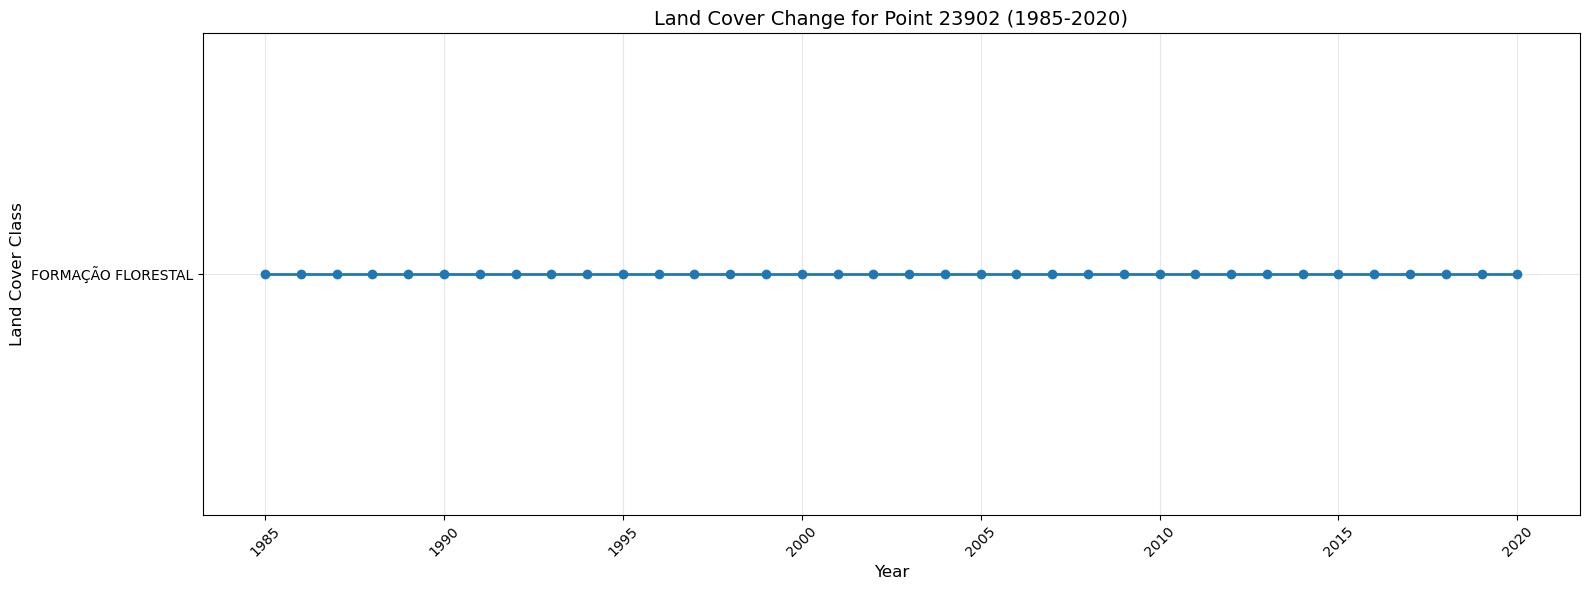


Unique classes in this time series:
{'FORMAÇÃO FLORESTAL'}


In [3]:
# Plot land cover class changes for the first row from 1985 to 2020
import matplotlib.pyplot as plt

# Extract the first row
first_row = df.iloc[0]

# Get all CLASS columns from 1985 to 2020
years = range(1985, 2021)
class_cols = [f'CLASS_{year}' for year in years]

# Extract class values for each year
classes = [first_row[col] for col in class_cols]

# Create the plot
fig, ax = plt.subplots(figsize=(16, 6))

# Plot as a categorical time series
ax.plot(years, classes, marker='o', linewidth=2, markersize=6)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Land Cover Class', fontsize=12)
ax.set_title(f'Land Cover Change for Point {first_row["TARGETID"]} (1985-2020)', fontsize=14)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print unique classes to understand the changes
print(f"\nUnique classes in this time series:")
print(set(classes))



Point 20540 (Row 72888):
  Biome: CAATINGA
  Location: (-38.3143, -5.3637)
  Transitions: RIO, LAGO E OCEANO -> FORMAÇÃO FLORESTAL

Point 77486 (Row 79257):
  Biome: MATA ATLÂNTICA
  Location: (-48.9094, -18.3436)
  Transitions: RIO, LAGO E OCEANO -> PASTAGEM

Point 22320 (Row 59735):
  Biome: AMAZÔNIA
  Location: (-50.1098, 0.8094)
  Transitions: NÃO OBSERVADO -> FORMAÇÃO FLORESTAL

Point 817 (Row 69662):
  Biome: MATA ATLÂNTICA
  Location: (-41.4824, -15.1733)
  Transitions: FORMAÇÃO SAVÂNICA -> PASTAGEM

Point 71963 (Row 3731):
  Biome: PAMPA
  Location: (-56.2855, -29.4430)
  Transitions: FORMAÇÃO CAMPESTRE -> LAVOURA TEMPORÁRIA

Point 17855 (Row 6157):
  Biome: CAATINGA
  Location: (-39.1001, -5.7547)
  Transitions: FORMAÇÃO SAVÂNICA -> PASTAGEM


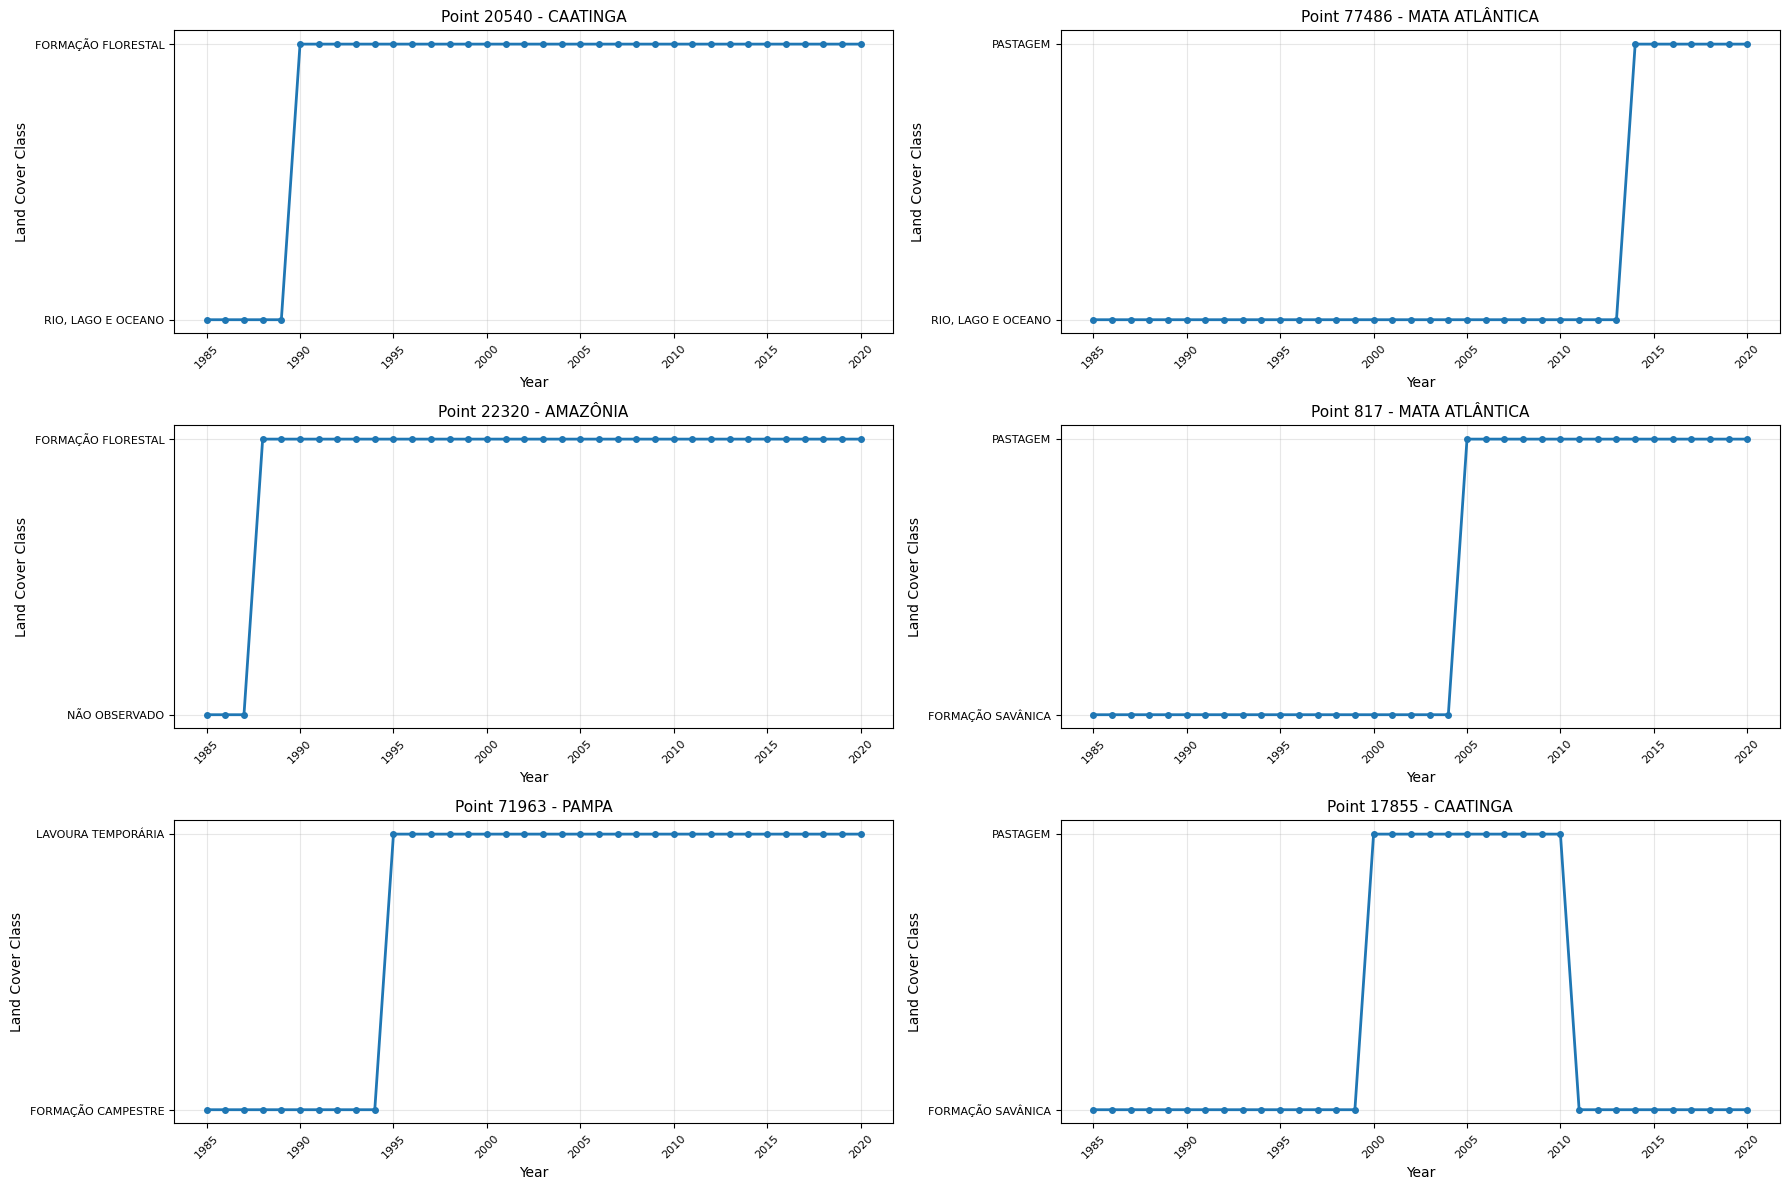

In [5]:
# Plot several examples of points with changes
import matplotlib.pyplot as plt

# Select 6 random points with changes to visualize
n_examples = min(6, len(changed_points))
example_indices = changed_points.sample(n_examples).index

fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()

for idx, row_idx in enumerate(example_indices):
    row = df.iloc[row_idx]
    
    # Get class values for each year
    classes = [row[col] for col in class_cols]
    
    # Plot
    ax = axes[idx]
    ax.plot(years, classes, marker='o', linewidth=2, markersize=4)
    ax.set_xlabel('Year', fontsize=10)
    ax.set_ylabel('Land Cover Class', fontsize=10)
    ax.set_title(f'Point {row["TARGETID"]} - {row["BIOMA_250K"]}', fontsize=11)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    
    # Print transition info
    unique_classes = list(dict.fromkeys(classes))  # preserve order
    print(f"\nPoint {row['TARGETID']} (Row {row_idx}):")
    print(f"  Biome: {row['BIOMA_250K']}")
    print(f"  Location: ({row['LON']:.4f}, {row['LAT']:.4f})")
    print(f"  Transitions: {' -> '.join(unique_classes)}")

plt.tight_layout()
plt.show()


In [7]:
# Analyze the most common transitions for changed points
from collections import Counter

transitions = []
for idx in changed_points.index:
    row = df.iloc[idx]
    classes = [row[col] for col in class_cols]
    # Get first and last class
    first_class = classes[0]
    last_class = classes[-1]
    if first_class != last_class:
        transition = f"{first_class} -> {last_class}"
        transition_en = f"{complete_translation.get(first_class, first_class)} -> {complete_translation.get(last_class, last_class)}"
        transitions.append((transition, transition_en))

# Count transitions
transition_counts = Counter([t[0] for t in transitions])
top_transitions = transition_counts.most_common(20)

print("="*80)
print("TOP 20 MOST COMMON LAND COVER TRANSITIONS (1985 -> 2020)")
print("="*80)
print(f"{'Portuguese':<50s} {'English':<50s} {'Count':>8s}")
print("-"*110)

for trans_pt, count in top_transitions:
    # Find corresponding English translation
    trans_en = None
    for t_pt, t_en in transitions:
        if t_pt == trans_pt:
            trans_en = t_en
            break
    if trans_en:
        print(f"{trans_pt:<50s} {trans_en:<50s} {count:>8d}")


TOP 20 MOST COMMON LAND COVER TRANSITIONS (1985 -> 2020)
Portuguese                                         English                                               Count
--------------------------------------------------------------------------------------------------------------
FORMAÇÃO FLORESTAL -> PASTAGEM                     Forest Formation -> Pasture                            5222
NÃO OBSERVADO -> FORMAÇÃO FLORESTAL                Not Observed -> Forest Formation                       2980
FORMAÇÃO SAVÂNICA -> PASTAGEM                      Savanna Formation -> Pasture                           2809
PASTAGEM -> LAVOURA TEMPORÁRIA                     Pasture -> Temporary Crop                              1677
NÃO OBSERVADO -> PASTAGEM                          Not Observed -> Pasture                                1051
FORMAÇÃO SAVÂNICA -> LAVOURA TEMPORÁRIA            Savanna Formation -> Temporary Crop                     803
PASTAGEM -> FORMAÇÃO FLORESTAL                     Past

In [6]:
# Complete translation dictionary based on actual classes found
complete_translation = {
    'FORMAÇÃO FLORESTAL': 'Forest Formation',
    'FORMAÇÃO SAVÂNICA': 'Savanna Formation', 
    'FORMAÇÃO CAMPESTRE': 'Grassland Formation',
    'FLORESTA PLANTADA': 'Planted Forest',
    'FLORESTA INUNDÁVEL': 'Flooded Forest',
    'PASTAGEM': 'Pasture',
    'AGRICULTURA': 'Agriculture',
    'LAVOURA TEMPORÁRIA': 'Temporary Crop',
    'LAVOURA PERENE': 'Perennial Crop',
    'CANA': 'Sugar Cane',
    'INFRAESTRUTURA URBANA': 'Urban Infrastructure',
    'VEGETAÇÃO URBANA': 'Urban Vegetation',
    'MINERAÇÃO': 'Mining',
    'OUTRA ÁREA NÃO VEGETADA': 'Other Non-Vegetated Area',
    'OUTRA FORMAÇÃO NÃO FLORESTAL': 'Other Non-Forest Formation',
    'RIO, LAGO E OCEANO': 'River, Lake and Ocean',
    'AQUICULTURA': 'Aquaculture',
    'CAMPO ALAGADO E ÁREA PANTANOSA': 'Flooded Field and Wetland',
    'PRAIA E DUNA': 'Beach and Dune',
    'AFLORAMENTO ROCHOSO': 'Rocky Outcrop',
    'APICUM': 'Salt Flat',
    'MANGUE': 'Mangrove',
    'RESTINGA HERBÁCEA': 'Herbaceous Restinga',
    'NÃO OBSERVADO': 'Not Observed',
    'FORMAÇ\x8fO FLORESTAL': 'Forest Formation'  # Handle encoding issue
}

print("="*80)
print("COMPLETE LAND COVER CLASS TRANSLATION (Portuguese -> English)")
print("="*80)
for pt, en in sorted(complete_translation.items()):
    print(f"{pt:45s} -> {en}")

# Save translation to CSV for reference
translation_df = pd.DataFrame(list(complete_translation.items()), 
                              columns=['Portuguese', 'English'])
translation_df = translation_df.sort_values('Portuguese')
print(f"\n✓ Translation table created with {len(translation_df)} classes")


COMPLETE LAND COVER CLASS TRANSLATION (Portuguese -> English)
AFLORAMENTO ROCHOSO                           -> Rocky Outcrop
AGRICULTURA                                   -> Agriculture
APICUM                                        -> Salt Flat
AQUICULTURA                                   -> Aquaculture
CAMPO ALAGADO E ÁREA PANTANOSA                -> Flooded Field and Wetland
CANA                                          -> Sugar Cane
FLORESTA INUNDÁVEL                            -> Flooded Forest
FLORESTA PLANTADA                             -> Planted Forest
FORMAÇO FLORESTAL                            -> Forest Formation
FORMAÇÃO CAMPESTRE                            -> Grassland Formation
FORMAÇÃO FLORESTAL                            -> Forest Formation
FORMAÇÃO SAVÂNICA                             -> Savanna Formation
INFRAESTRUTURA URBANA                         -> Urban Infrastructure
LAVOURA PERENE                                -> Perennial Crop
LAVOURA TEMPORÁRIA           

In [4]:
# Find points with land cover changes and analyze class types

# Get all CLASS columns from 1985 to 2020
years = range(1985, 2021)
class_cols = [f'CLASS_{year}' for year in years]

# For each row, check if there are any changes
def has_change(row):
    classes = [row[col] for col in class_cols]
    return len(set(classes)) > 1

# Find rows with changes
df['has_change'] = df.apply(has_change, axis=1)
changed_points = df[df['has_change']]
stable_points = df[~df['has_change']]

print(f"Total points: {len(df)}")
print(f"Points with changes: {len(changed_points)} ({len(changed_points)/len(df)*100:.2f}%)")
print(f"Stable points: {len(stable_points)} ({len(stable_points)/len(df)*100:.2f}%)")

# Get all unique land cover classes across all years
all_classes = set()
for col in class_cols:
    all_classes.update(df[col].dropna().unique())

print(f"\n{'='*70}")
print(f"All unique land cover classes in dataset:")
print(f"{'='*70}")
for i, class_name in enumerate(sorted(all_classes), 1):
    print(f"{i:2d}. {class_name}")

# Translation dictionary (Portuguese to English)
class_translation = {
    'FORMAÇÃO FLORESTAL': 'Forest Formation',
    'FORMAÇÃO SAVÂNICA': 'Savanna Formation',
    'FORMAÇÃO CAMPESTRE': 'Grassland Formation',
    'FLORESTA PLANTADA': 'Planted Forest',
    'PASTAGEM': 'Pasture',
    'MOSAICO DE AGRICULTURA E PASTAGEM': 'Agriculture and Pasture Mosaic',
    'AGRICULTURA': 'Agriculture',
    'ÁREA URBANIZADA': 'Urban Area',
    'MINERAÇÃO': 'Mining',
    'OUTRAS ÁREAS NÃO VEGETADAS': 'Other Non-Vegetated Areas',
    'RIO, LAGO E OCEANO': 'River, Lake and Ocean',
    'AQUICULTURA': 'Aquaculture',
    'ÁREA ÚMIDA': 'Wetland',
    'PRAIA E DUNA': 'Beach and Dune',
    'AFLORAMENTO ROCHOSO': 'Rocky Outcrop',
    'APICUM': 'Salt Flat',
    'MANGUE': 'Mangrove'
}

print(f"\n{'='*70}")
print(f"Land Cover Classes - Portuguese to English Translation:")
print(f"{'='*70}")
for pt, en in sorted(class_translation.items()):
    print(f"{pt:45s} -> {en}")


Total points: 85152
Points with changes: 24346 (28.59%)
Stable points: 60806 (71.41%)

All unique land cover classes in dataset:
 1. AFLORAMENTO ROCHOSO
 2. APICUM
 3. AQUICULTURA
 4. CAMPO ALAGADO E ÁREA PANTANOSA
 5. CANA
 6. FLORESTA INUNDÁVEL
 7. FLORESTA PLANTADA
 8. FORMAÇÃO CAMPESTRE
 9. FORMAÇÃO FLORESTAL
10. FORMAÇÃO SAVÂNICA
11. FORMAÇ��O FLORESTAL
12. INFRAESTRUTURA URBANA
13. LAVOURA PERENE
14. LAVOURA TEMPORÁRIA
15. MANGUE
16. MINERAÇÃO
17. NÃO OBSERVADO
18. OUTRA FORMAÇÃO NÃO FLORESTAL
19. OUTRA ÁREA NÃO VEGETADA
20. PASTAGEM
21. PRAIA E DUNA
22. RESTINGA HERBÁCEA
23. RIO, LAGO E OCEANO
24. VEGETAÇÃO URBANA

Land Cover Classes - Portuguese to English Translation:
AFLORAMENTO ROCHOSO                           -> Rocky Outcrop
AGRICULTURA                                   -> Agriculture
APICUM                                        -> Salt Flat
AQUICULTURA                                   -> Aquaculture
FLORESTA PLANTADA                             -> Planted Forest
FORMAÇ

In [ ]:
# Create English version of the dataset
import numpy as np

# Create a copy of the dataframe
df_english = df.copy()

# Translate all CLASS columns from Portuguese to English
print("Translating land cover classes to English...")
for col in class_cols:
    if col in df_english.columns:
        df_english[col] = df_english[col].map(lambda x: complete_translation.get(x, x) if pd.notna(x) else x)
        
# Also translate the biome names
biome_translation = {
    'AMAZÔNIA': 'Amazon',
    'MATA ATLÂNTICA': 'Atlantic Forest',
    'CERRADO': 'Cerrado',
    'CAATINGA': 'Caatinga',
    'PAMPA': 'Pampa',
    'PANTANAL': 'Pantanal'
}

if 'BIOMA_250K' in df_english.columns:
    df_english['BIOMA_250K'] = df_english['BIOMA_250K'].map(lambda x: biome_translation.get(x, x) if pd.notna(x) else x)

# Save to CSV
output_file = folder + 'mapbiomas_85k_col2_1_points_english.csv'
df_english.to_csv(output_file, index=False)

print(f"\n✓ English version saved to:")
print(f"  {output_file}")
print(f"\n✓ Total rows: {len(df_english)}")
print(f"✓ Total columns: {len(df_english.columns)}")
print(f"✓ Translated {len(class_cols)} CLASS columns (1985-2020)")
print(f"✓ Translated BIOMA_250K column")

# Show a sample of the translated data
print("\n" + "="*80)
print("Sample of translated data (first row):")
print("="*80)
sample_cols = ['TARGETID', 'LON', 'LAT', 'BIOMA_250K', 'CLASS_1985', 'CLASS_2000', 'CLASS_2020']
available_cols = [col for col in sample_cols if col in df_english.columns]
print(df_english[available_cols].head(1).to_string(index=False))


Translating land cover classes to English...

✓ English version saved to:
  /projectnb/modislc/users/chishan/data/MapBiomas/MAPBIOMAS/mapbiomas_85k_col2_1_points_english.csv

✓ Total rows: 85152
✓ Total columns: 136
✓ Translated 36 CLASS columns (1985-2020)
✓ Translated BIOMA_250K column

Sample of translated data (first row):
 TARGETID        LON      LAT BIOMA_250K       CLASS_1985       CLASS_2000       CLASS_2020
    23902 -60.109099 1.966324     Amazon Forest Formation Forest Formation Forest Formation

✓ English version saved to:
  /projectnb/modislc/users/chishan/data/MapBiomas/MAPBIOMAS/mapbiomas_85k_col2_1_points_english.csv

✓ Total rows: 85152
✓ Total columns: 136
✓ Translated 36 CLASS columns (1985-2020)
✓ Translated BIOMA_250K column

Sample of translated data (first row):
 TARGETID        LON      LAT BIOMA_250K       CLASS_1985       CLASS_2000       CLASS_2020
    23902 -60.109099 1.966324     Amazon Forest Formation Forest Formation Forest Formation


In [ ]:
df_english.columns.tolist()


['TARGETID',
 'LON',
 'LAT',
 'BIOMA_250K',
 'CLASS_1985',
 'COUNT_1985',
 'BORDA_1985',
 'CLASS_1986',
 'COUNT_1986',
 'BORDA_1986',
 'CLASS_1987',
 'COUNT_1987',
 'BORDA_1987',
 'CLASS_1988',
 'COUNT_1988',
 'BORDA_1988',
 'CLASS_1989',
 'COUNT_1989',
 'BORDA_1989',
 'CLASS_1990',
 'COUNT_1990',
 'BORDA_1990',
 'CLASS_1991',
 'COUNT_1991',
 'BORDA_1991',
 'CLASS_1992',
 'COUNT_1992',
 'BORDA_1992',
 'CLASS_1993',
 'COUNT_1993',
 'BORDA_1993',
 'CLASS_1994',
 'COUNT_1994',
 'BORDA_1994',
 'CLASS_1995',
 'COUNT_1995',
 'BORDA_1995',
 'CLASS_1996',
 'COUNT_1996',
 'BORDA_1996',
 'CLASS_1997',
 'COUNT_1997',
 'BORDA_1997',
 'CLASS_1998',
 'COUNT_1998',
 'BORDA_1998',
 'CLASS_1999',
 'COUNT_1999',
 'BORDA_1999',
 'CLASS_2000',
 'COUNT_2000',
 'BORDA_2000',
 'CLASS_2001',
 'COUNT_2001',
 'BORDA_2001',
 'CLASS_2002',
 'COUNT_2002',
 'BORDA_2002',
 'CLASS_2003',
 'COUNT_2003',
 'BORDA_2003',
 'CLASS_2004',
 'COUNT_2004',
 'BORDA_2004',
 'CLASS_2005',
 'COUNT_2005',
 'BORDA_2005',
 'CLASS_200

In [23]:
df_english[df_english['BIOMA_250K']=='Amazon']


,TARGETID,LON,LAT,BIOMA_250K,CLASS_1985,COUNT_1985,BORDA_1985,CLASS_1986,COUNT_1986,BORDA_1986,...,CONCORD,AMOSTRAS,AMOSTRA_AM,CARTA_2,PROB_AMOS_,PESO_AMOS,DECLIVIDAD,FID,ID_REVISAO,has_change
0,23902,-60.109099,1.966324,Amazon,Forest Formation,3,1,Forest Formation,3,1,...,4,Treinamento,1,NA-20-Z,"6,139945317647E-06","162867,9",D4,0,NaN,False
1,23947,-60.534361,0.467396,Amazon,Forest Formation,3,0,Forest Formation,3,0,...,3,NaN,0,NA-20-Z,"6,20176866388049E-06","161244,324675325",D3,0,NaN,False
2,24072,-60.392337,1.224136,Amazon,Pasture,3,0,Pasture,3,0,...,3,NaN,0,NA-20-Z,"6,1420412258699E-06","162812,32300885",D2,0,NaN,False
3,24079,-60.235761,0.942515,Amazon,Forest Formation,3,0,Forest Formation,3,0,...,4,Treinamento,1,NA-20-Z,"6,15300834369149E-06","162522,126436782",D1,0,NaN,True
4,24119,-61.351199,1.061901,Amazon,"River, Lake and Ocean",3,0,"River, Lake and Ocean",3,0,...,3,Treinamento,1,NA-20-Z,"6,15300834369149E-06","162522,126436782",D1,0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85147,69346,-59.366911,-8.337801,Amazon,Forest Formation,3,0,Forest Formation,3,0,...,3,NaN,0,SC-21-V,"6,37554802375989E-06","156849,261627907",D3,0,NaN,False
85148,69367,-57.235208,-9.728393,Amazon,Forest Formation,3,0,Forest Formation,3,0,...,4,NaN,0,SC-21-V,"6,36942059371303E-06","157000,151785714",D2,0,NaN,True
85149,70981,-57.385047,-8.440478,Amazon,Forest Formation,3,0,Forest Formation,3,0,...,3,NaN,0,SC-21-V,"6,39863168247499E-06","156283,413333333",D1,0,NaN,False
85150,71126,-57.442719,-8.065881,Amazon,Forest Formation,3,0,Forest Formation,3,0,...,3,NaN,0,SC-21-V,"6,36942059371303E-06","157000,151785714",D2,0,NaN,False


Total Amazon points: 35289
Amazon points with changes: 8890

Point 44018 (Row 44322):
  Location: (-52.3967, -2.6205)
  Transition: Forest Formation → Forest Formation

Point 50342 (Row 7084):
  Location: (-51.2045, -6.5009)
  Transition: Pasture → Forest Formation

Point 42838 (Row 16960):
  Location: (-52.5137, -0.1336)
  Transition: Forest Formation → Forest Formation

Point 58899 (Row 44013):
  Location: (-45.6459, -4.7562)
  Transition: Forest Formation → Pasture

Point 21402 (Row 81857):
  Location: (-51.3236, 3.0648)
  Transition: Forest Formation → Forest Formation

Point 66186 (Row 40412):
  Location: (-59.3192, -16.1887)
  Transition: Savanna Formation → Pasture

Point 50944 (Row 7251):
  Location: (-51.3710, -6.7189)
  Transition: Pasture → Pasture

Point 26952 (Row 21787):
  Location: (-68.1012, 1.2807)
  Transition: Forest Formation → Forest Formation


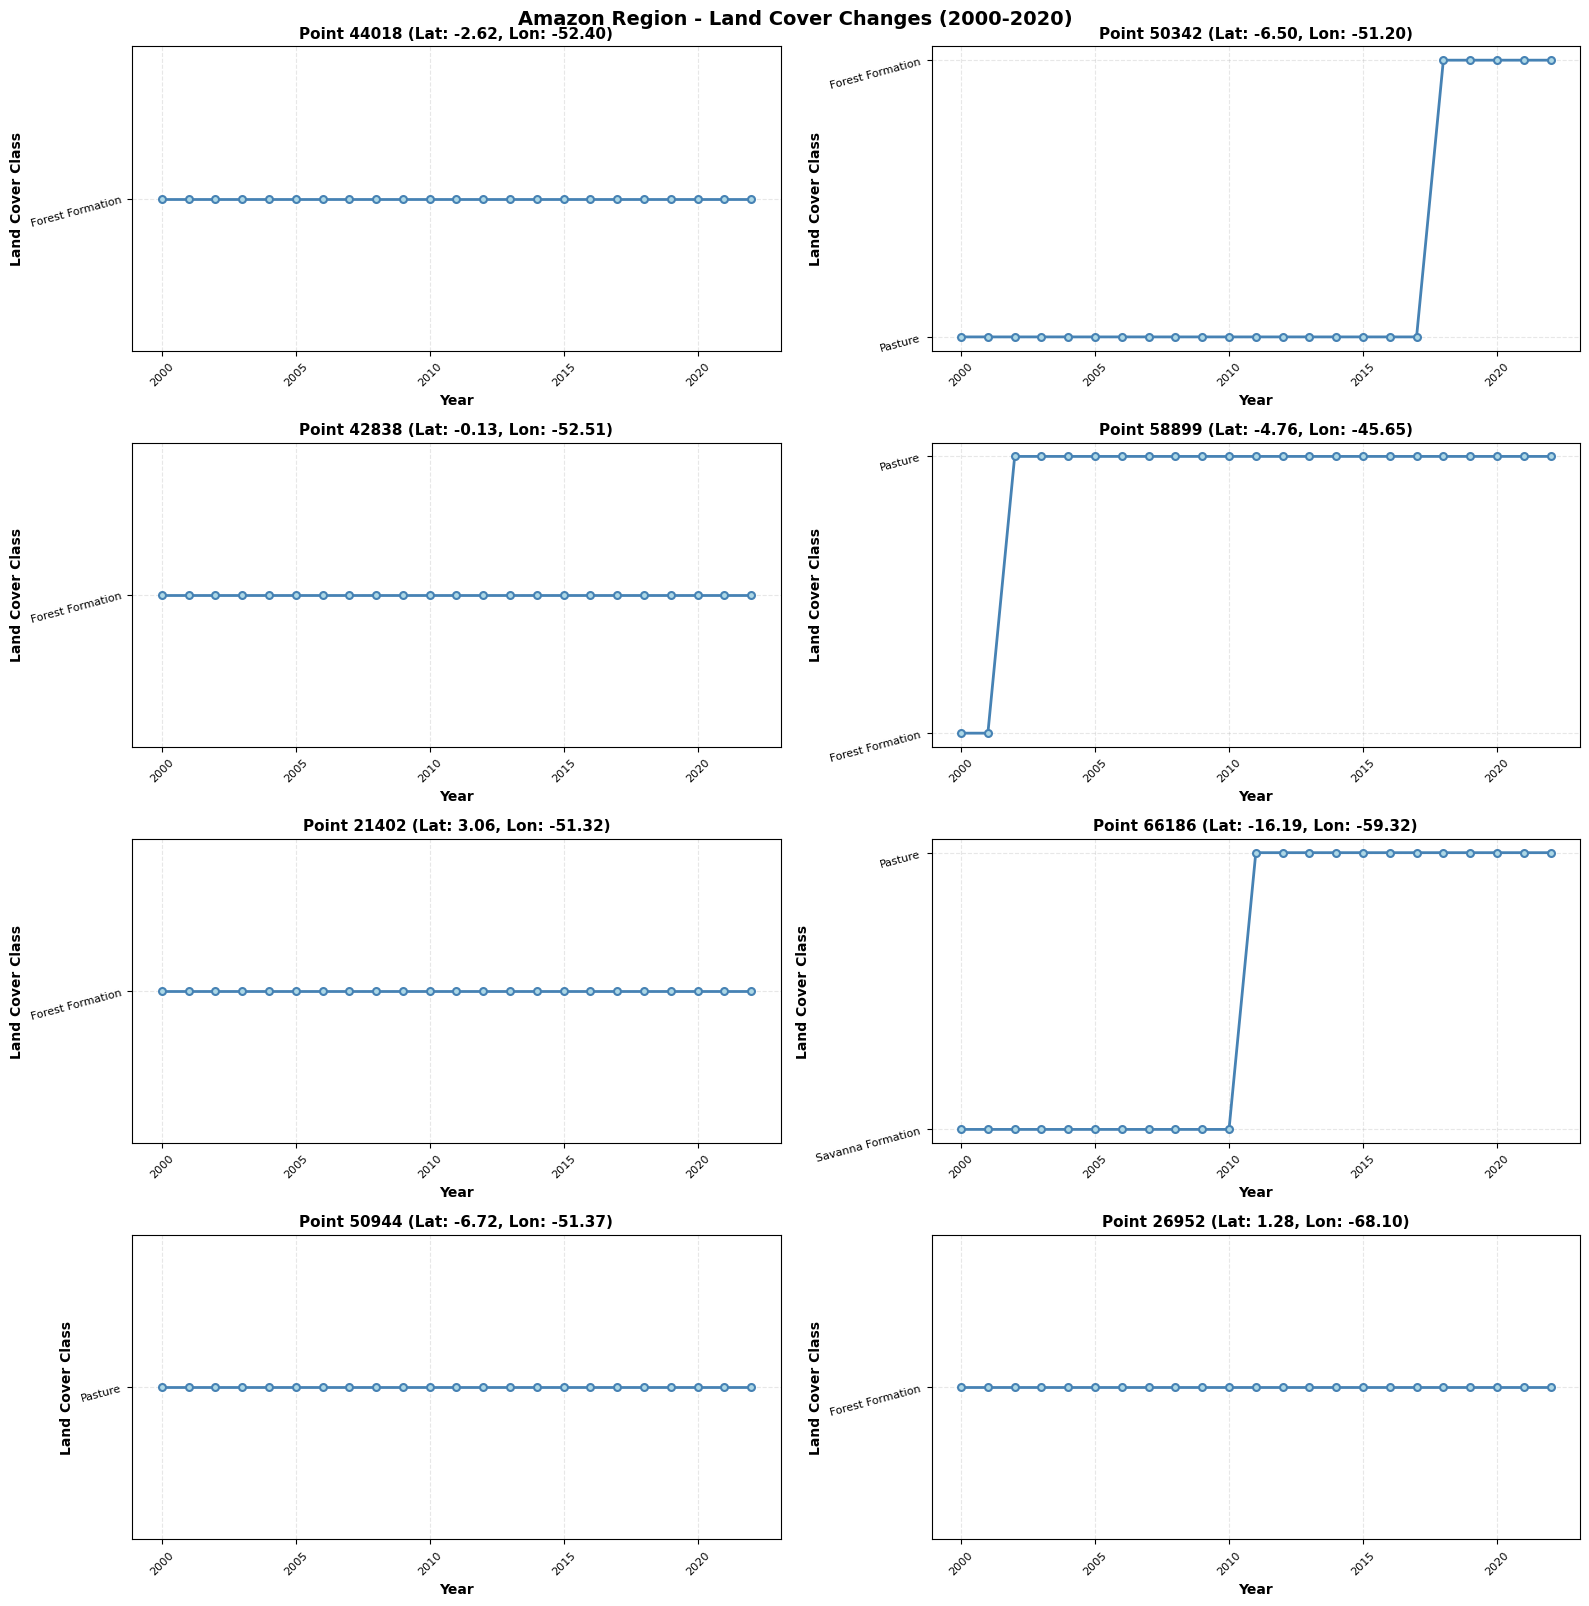


Successfully plotted 8 Amazon points with land cover changes


In [26]:
# Plot time series for Amazon points (2000-2020)
import matplotlib.pyplot as plt
import numpy as np

# Filter for Amazon region and points with changes
amazon_points = df_english[df_english['BIOMA_250K'] == 'Amazon'].copy()
amazon_changed = amazon_points[amazon_points['has_change']].copy()

print(f"Total Amazon points: {len(amazon_points)}")
print(f"Amazon points with changes: {len(amazon_changed)}")

# Select 8 random points with changes
n_examples = min(8, len(amazon_changed))
example_indices = amazon_changed.sample(n_examples, random_state=42).index

# Create figure with subplots
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
axes = axes.flatten()

# Years from 2000 to 2024
years_range = range(2000, 2023)
class_cols_range = [f'CLASS_{year}' for year in years_range]

for idx, row_idx in enumerate(example_indices):
    row = df_english.iloc[row_idx]
    
    # Get class values for 2000-2020
    classes = [row[col] for col in class_cols_range]
    
    # Create a numeric mapping for visualization (color-coded by class)
    unique_classes = sorted(set([c for c in classes if pd.notna(c)]))
    class_to_num = {cls: i for i, cls in enumerate(unique_classes)}
    class_nums = [class_to_num.get(c, -1) for c in classes]
    
    # Plot
    ax = axes[idx]
    colors = plt.cm.tab20(np.linspace(0, 1, len(unique_classes)))
    
    # Plot as line with markers
    ax.plot(years_range, classes, marker='o', linewidth=2, markersize=5, 
            color='steelblue', markerfacecolor='lightblue', markeredgewidth=1.5)
    
    ax.set_xlabel('Year', fontsize=10, fontweight='bold')
    ax.set_ylabel('Land Cover Class', fontsize=10, fontweight='bold')
    ax.set_title(f'Point {row["TARGETID"]} (Lat: {row["LAT"]:.2f}, Lon: {row["LON"]:.2f})', 
                 fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    
    # Rotate y-axis labels to prevent overlap
    ax.set_yticklabels(ax.get_yticklabels(), rotation=15, ha='right')
    
    # Print transition info
    unique_classes_list = list(dict.fromkeys(classes))  # preserve order
    first_class = unique_classes_list[0]
    last_class = unique_classes_list[-1]
    
    print(f"\nPoint {row['TARGETID']} (Row {row_idx}):")
    print(f"  Location: ({row['LON']:.4f}, {row['LAT']:.4f})")
    print(f"  Transition: {first_class} → {last_class}")
    if len(unique_classes_list) > 2:
        print(f"  All transitions: {' → '.join(unique_classes_list)}")

plt.tight_layout()
plt.suptitle('Amazon Region - Land Cover Changes (2000-2020)', 
             fontsize=14, fontweight='bold', y=1.001)
plt.show()

print("\n" + "="*80)
print(f"Successfully plotted {n_examples} Amazon points with land cover changes")
print("="*80)


In [21]:
# Check what CLASS columns exist in the data
class_columns = [col for col in df.columns if col.startswith('CLASS_') and col != 'CLASS_NAME']
# Filter to only numeric year columns
class_columns_sorted = sorted([col for col in class_columns if col.split('_')[1].isdigit()], 
                             key=lambda x: int(x.split('_')[1]))

print("All CLASS columns in dataset:")
print(f"Total CLASS columns: {len(class_columns_sorted)}")
if class_columns_sorted:
    years_in_data = [int(col.split('_')[1]) for col in class_columns_sorted]
    print(f"Year range: {min(years_in_data)} to {max(years_in_data)}")
    print(f"\nFirst 5 columns: {class_columns_sorted[:5]}")
    print(f"Last 5 columns: {class_columns_sorted[-5:]}")


All CLASS columns in dataset:
Total CLASS columns: 39
Year range: 1985 to 2023

First 5 columns: ['CLASS_1985', 'CLASS_1986', 'CLASS_1987', 'CLASS_1988', 'CLASS_1989']
Last 5 columns: ['CLASS_2019', 'CLASS_2020', 'CLASS_2021', 'CLASS_2022', 'CLASS_2023']


In [22]:
# Recreate English version with ALL years (1985-2023)
import numpy as np

print("="*80)
print("Creating complete English translation (1985-2023)")
print("="*80)

# Create a fresh copy from original Portuguese dataframe
df_english_complete = df.copy()

# Get ALL CLASS columns with year numbers
all_class_cols = sorted([col for col in df_english_complete.columns 
                         if col.startswith('CLASS_') and col.split('_')[1].isdigit()],
                        key=lambda x: int(x.split('_')[1]))

print(f"\nTranslating {len(all_class_cols)} columns...")
print(f"Year range: {all_class_cols[0]} to {all_class_cols[-1]}")

# Translate all CLASS columns
for col in all_class_cols:
    if col in df_english_complete.columns:
        df_english_complete[col] = df_english_complete[col].map(
            lambda x: complete_translation.get(x, x) if pd.notna(x) else x
        )

# Also translate the biome names
biome_translation = {
    'AMAZÔNIA': 'Amazon',
    'MATA ATLÂNTICA': 'Atlantic Forest',
    'CERRADO': 'Cerrado',
    'CAATINGA': 'Caatinga',
    'PAMPA': 'Pampa',
    'PANTANAL': 'Pantanal'
}

if 'BIOMA_250K' in df_english_complete.columns:
    df_english_complete['BIOMA_250K'] = df_english_complete['BIOMA_250K'].map(
        lambda x: biome_translation.get(x, x) if pd.notna(x) else x
    )

# Save to CSV - OVERWRITE the previous file
output_file = folder + 'mapbiomas_85k_col2_1_points_english.csv'
df_english_complete.to_csv(output_file, index=False)

print(f"\n✓ English version OVERWRITTEN (complete 1985-2023):")
print(f"  {output_file}")
print(f"\n✓ Total rows: {len(df_english_complete)}")
print(f"✓ Total columns: {len(df_english_complete.columns)}")
print(f"✓ Translated {len(all_class_cols)} CLASS columns ({all_class_cols[0]} to {all_class_cols[-1]})")
print(f"✓ Translated BIOMA_250K column")

# Show sample of translated data
print("\n" + "="*80)
print("Sample of complete translated data (first row):")
print("="*80)
sample_cols = ['TARGETID', 'LON', 'LAT', 'BIOMA_250K', 'CLASS_1985', 'CLASS_2000', 'CLASS_2010', 'CLASS_2020', 'CLASS_2023']
available_cols = [col for col in sample_cols if col in df_english_complete.columns]
print(df_english_complete[available_cols].head(1).to_string(index=False))

# Update the df_english variable for consistency
df_english = df_english_complete
print("\n✓ df_english variable updated with complete data")


Creating complete English translation (1985-2023)

Translating 39 columns...
Year range: CLASS_1985 to CLASS_2023

✓ English version OVERWRITTEN (complete 1985-2023):
  /projectnb/modislc/users/chishan/data/MapBiomas/MAPBIOMAS/mapbiomas_85k_col2_1_points_english.csv

✓ Total rows: 85152
✓ Total columns: 136
✓ Translated 39 CLASS columns (CLASS_1985 to CLASS_2023)
✓ Translated BIOMA_250K column

Sample of complete translated data (first row):
 TARGETID        LON      LAT BIOMA_250K       CLASS_1985       CLASS_2000       CLASS_2010       CLASS_2020 CLASS_2023
    23902 -60.109099 1.966324     Amazon Forest Formation Forest Formation Forest Formation Forest Formation        NaN

✓ df_english variable updated with complete data
